In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [110]:
import yfinance as yf

start = '2013-01-01'
end = '2023-01-01'

df = yf.download('AAPL', start=start, end=end)
df.tail()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.299820,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.477585,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.504547,85438400
2022-12-29,127.989998,130.479996,127.730003,129.610001,129.059372,75703700
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.378006,77034200


In [111]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.791183,560518000
1,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.579243,352965200
2,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.117437,594333600
3,2013-01-07,18.642857,18.903570,18.400000,18.710714,16.022619,484156400
4,2013-01-08,18.900356,18.996071,18.616072,18.761070,16.065746,458707200


In [112]:
df = df.drop(['Date','Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,19.779285,19.821428,19.343929,19.608213,560518000
1,19.567142,19.631071,19.321428,19.360714,352965200
2,19.177500,19.236786,18.779642,18.821428,594333600
3,18.642857,18.903570,18.400000,18.710714,484156400
4,18.900356,18.996071,18.616072,18.761070,458707200


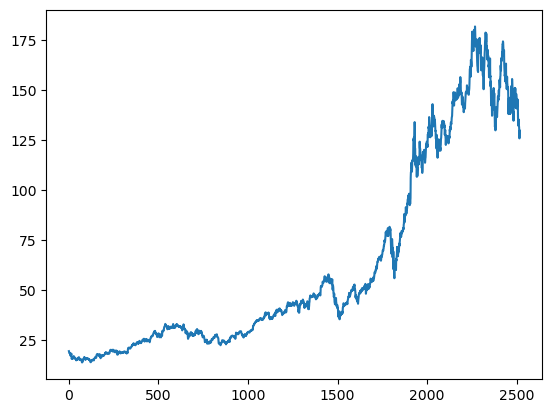

In [113]:
plt.plot(df.Close)

In [114]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2513    150.515600
2514    150.157800
2515    149.764699
2516    149.412100
2517    149.062199
Name: Close, Length: 2518, dtype: float64

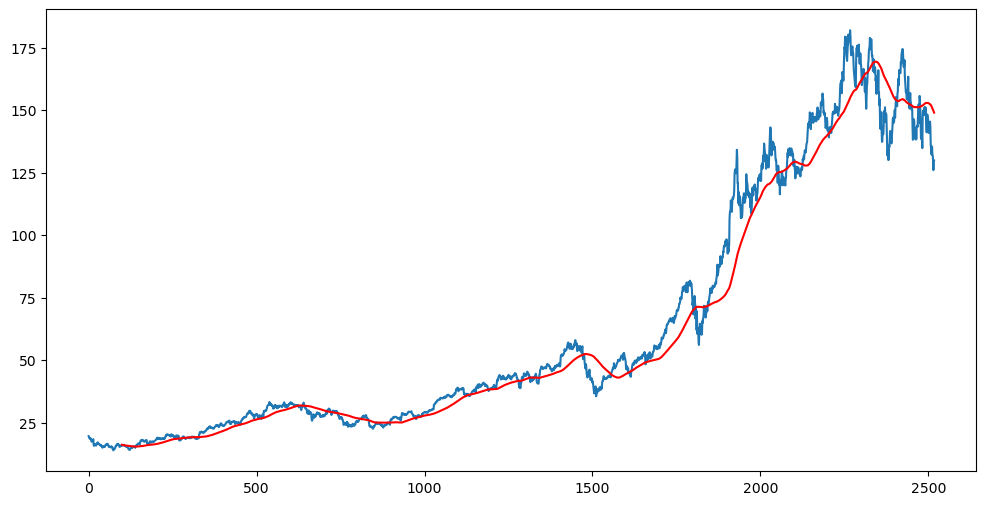

In [115]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100, "r")

In [116]:
ma200 = df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2513    152.1331
2514    152.0096
2515    151.8867
2516    151.7593
2517    151.6110
Name: Close, Length: 2518, dtype: float64

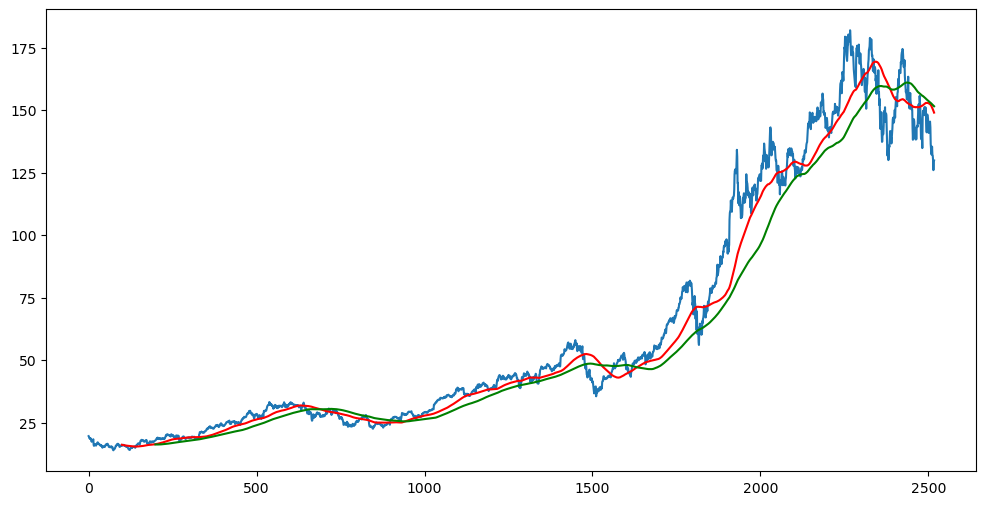

In [117]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100, "r")
plt.plot(ma200, "g")

In [118]:
df.shape

(2518, 5)

In [119]:
# splitting data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1762, 1)
(756, 1)


In [120]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [121]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.09519404],
       [0.09103193],
       [0.08196297],
       ...,
       [0.98381398],
       [0.99104513],
       [1.        ]])

In [122]:
x_train =[]
y_train =[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [123]:
# ML Model

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


In [124]:
model =Sequential()
model.add(LSTM(units=50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))



In [125]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_13 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_14 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_14 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_15 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_15 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_16 (LSTM)              (None, 120)              

In [126]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs= 50)

Epoch 1/50
52/52 [==============================] - 18s 219ms/step - loss: 0.0305
Epoch 2/50
52/52 [==============================] - 10s 193ms/step - loss: 0.0070
Epoch 3/50
52/52 [==============================] - 9s 182ms/step - loss: 0.0057
Epoch 4/50
52/52 [==============================] - 10s 193ms/step - loss: 0.0057
Epoch 5/50
52/52 [==============================] - 10s 198ms/step - loss: 0.0049
Epoch 6/50
52/52 [==============================] - 10s 186ms/step - loss: 0.0046
Epoch 7/50
52/52 [==============================] - 11s 205ms/step - loss: 0.0058
Epoch 8/50
52/52 [==============================] - 13s 244ms/step - loss: 0.0041
Epoch 9/50
52/52 [==============================] - 9s 181ms/step - loss: 0.0044
Epoch 10/50
52/52 [==============================] - 9s 182ms/step - loss: 0.0038
Epoch 11/50
52/52 [==============================] - 9s 173ms/step - loss: 0.0041
Epoch 12/50
52/52 [==============================] - 17s 320ms/step - loss: 0.0035
Epoch 13/50
52/52

In [127]:
model.save('keras_model.h5')

In [128]:
data_testing.head()

,Close
1762,75.087502
1763,74.357498
1764,74.949997
1765,74.597504
1766,75.797501


In [129]:
past_100_days = data_training.tail(100)

In [130]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\shind\AppData\Local\Temp\ipykernel_8860\531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [131]:
final_df.head()

,Close
0,50.247501
1,50.119999
2,52.242500
3,50.687500
4,50.435001


In [132]:
input_data = scaler.fit_transform(final_df)
input_data

array([[9.66733230e-04],
       [0.00000000e+00],
       [1.60929672e-02],
       [4.30283636e-03],
       [2.38837252e-03],
       [1.14110328e-02],
       [1.87087928e-02],
       [1.87277375e-02],
       [2.30495187e-02],
       [2.27083391e-02],
       [4.09432810e-03],
       [1.13920880e-02],
       [6.97552517e-03],
       [9.57237702e-03],
       [1.61687752e-02],
       [1.56570059e-02],
       [9.89461179e-03],
       [1.65099837e-02],
       [2.42626497e-02],
       [2.42247312e-02],
       [2.59496605e-02],
       [3.07453214e-02],
       [4.38054466e-02],
       [4.28576870e-02],
       [3.46311413e-02],
       [3.68109766e-02],
       [3.83273976e-02],
       [4.22511360e-02],
       [3.88202511e-02],
       [3.26977037e-02],
       [3.45742780e-02],
       [3.26029220e-02],
       [3.89529224e-02],
       [3.67920318e-02],
       [3.47638415e-02],
       [4.45257531e-02],
       [4.57009656e-02],
       [3.50292130e-02],
       [3.85548796e-02],
       [5.02881183e-02],


In [133]:
input_data.shape

(856, 1)

In [134]:
x_test =[]
y_test =[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])
    
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [135]:
# Making Predictions

y_predicted = model.predict(x_test)

24/24 [==============================] - 2s 53ms/step


In [136]:
y_predicted.shape

(756, 1)

In [137]:
y_test

array([0.18930551, 0.18377057, 0.18826294, 0.18559031, 0.19468878,
       0.20689592, 0.20822275, 0.22079005, 0.21267723, 0.21013724,
       0.21752976, 0.22414516, 0.22005083, 0.22219278, 0.22509292,
       0.22334901, 0.20560698, 0.2221738 , 0.23477899, 0.2338881 ,
       0.20666847, 0.20505727, 0.22437261, 0.22930097, 0.23642808,
       0.22660931, 0.22949048, 0.22581317, 0.24020021, 0.23578361,
       0.23593529, 0.22465693, 0.23341422, 0.22712108, 0.21337857,
       0.18519221, 0.16604745, 0.17470999, 0.1384487 , 0.13814541,
       0.18638639, 0.16839793, 0.19383577, 0.17522182, 0.16784822,
       0.12451668, 0.16085375, 0.14206915, 0.09051103, 0.14688378,
       0.07910003, 0.0992873 , 0.08755403, 0.0839715 , 0.05451515,
       0.04528395, 0.0879521 , 0.08537419, 0.1098643 , 0.08958225,
       0.10298355, 0.10199788, 0.07663585, 0.08425582, 0.07758361,
       0.11750324, 0.11174084, 0.12432712, 0.12796648, 0.13793693,
       0.16409507, 0.15912882, 0.16341271, 0.15603911, 0.14491

In [138]:
y_predicted

array([[0.19238108],
       [0.19498223],
       [0.19771865],
       [0.20056747],
       [0.20346595],
       [0.2063854 ],
       [0.20936708],
       [0.2124494 ],
       [0.21570991],
       [0.21913585],
       [0.22261523],
       [0.22607258],
       [0.22945178],
       [0.2326969 ],
       [0.23574936],
       [0.23856169],
       [0.241099  ],
       [0.24319628],
       [0.24481899],
       [0.24608478],
       [0.24714473],
       [0.24795413],
       [0.24840616],
       [0.24854   ],
       [0.24849308],
       [0.2484658 ],
       [0.2485567 ],
       [0.24881494],
       [0.24921675],
       [0.24980958],
       [0.25059515],
       [0.2515397 ],
       [0.25251076],
       [0.2534193 ],
       [0.2541671 ],
       [0.25460723],
       [0.25447422],
       [0.25345588],
       [0.25146872],
       [0.24837427],
       [0.24418296],
       [0.23927945],
       [0.23406214],
       [0.22905779],
       [0.2246013 ],
       [0.2208371 ],
       [0.21756732],
       [0.214

In [139]:
scaler.scale_

array([0.00758208])

In [140]:
scale_factor = 1/0.00653061
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

In [141]:
# plt.figure(figsize=(12,16))
# plt.plot(y_test, 'b', label = 'Original Price')
# plt.plot(y_predicted, 'r', label = 'Predicted Price')
# plt.xlabel('Time')
# plt.ylabel('Price')
# plt.legend()
# plt.show()

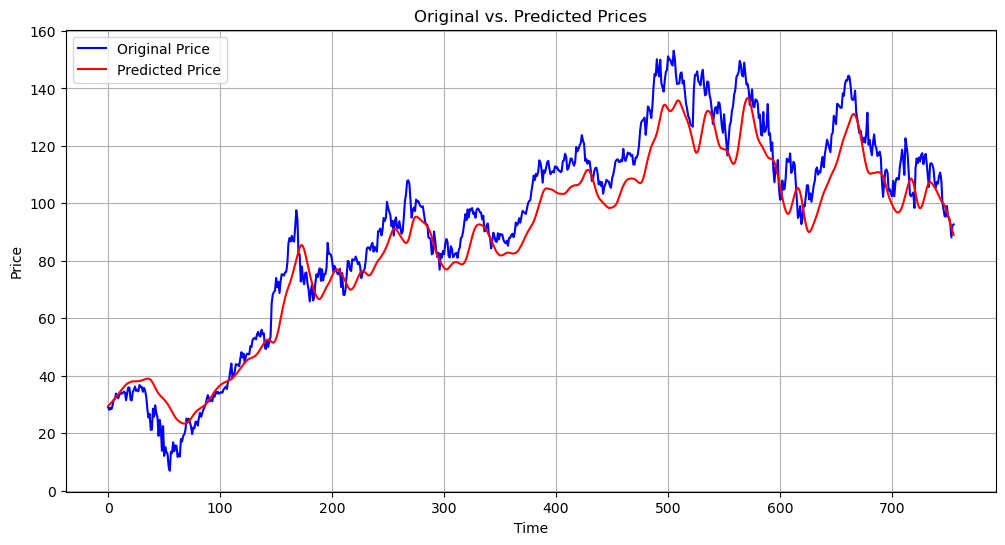

In [142]:


plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.title('Original vs. Predicted Prices')  # Add a title if needed
plt.grid(True)  # Add gridlines if desired
plt.show()
